In [135]:
!pip3 install -q pandas


In [136]:
!pip3 install -q matplotlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [137]:
!pip install -q biopython


In [8]:
from Bio import SeqIO

In [56]:
covid19_var1 = SeqIO.read("/Users/sweety/Downloads/MN908947.fna","fasta")
covid19_var_JN1_4 = SeqIO.read("/Users/sweety/Downloads/sequence.fasta","fasta")
print(f'the genome of the virus causing Covid-19 reference genome consists of {len(covid19_var1)} genetic bases.')
print(f'The genome of the virus causing Covid-19 variant JN1.4 consists of {len(covid19_var_JN3)} genetic bases.')


the genome of the virus causing Covid-19 reference genome consists of 29903 genetic bases.
The genome of the virus causing Covid-19 variant JN1.4 consists of 29691 genetic bases.


In [54]:
covid19_rer = covid19_var1.seq
print(covid19_rer[:20])

ATTAAAGGTTTATACCTTCC


{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}
{'A': 8878, 'C': 5419, 'T': 9572, 'G': 5822}


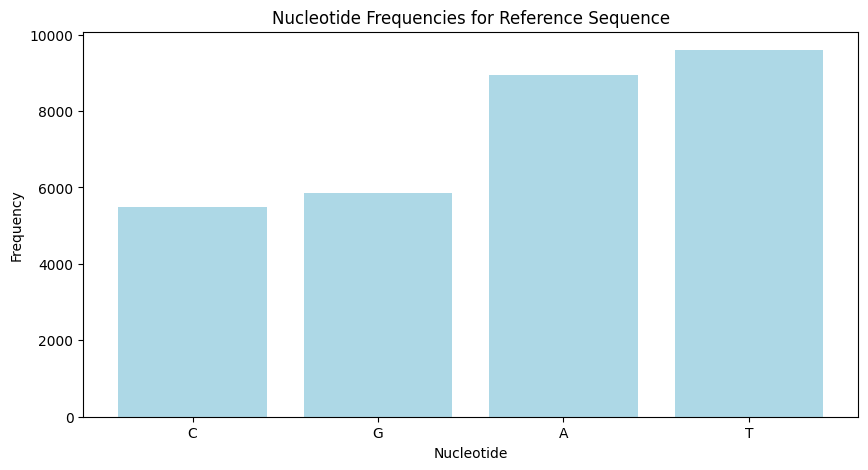

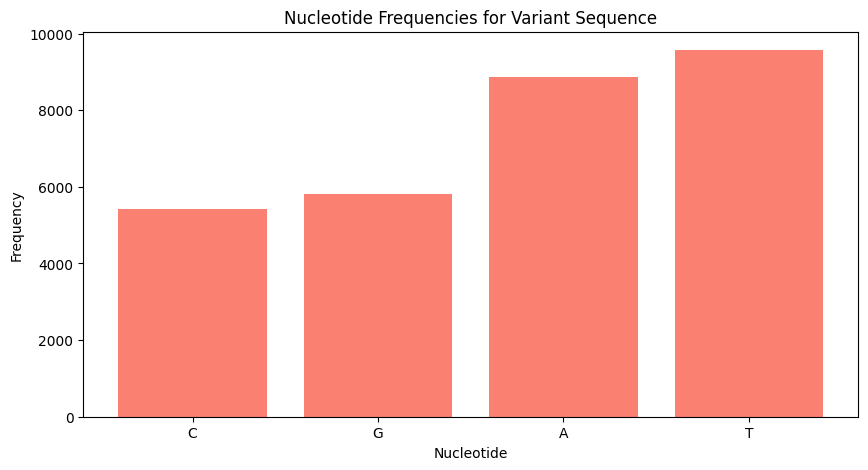

In [60]:

# Calculate nucleotide frequencies for the reference sequence (covid19_var1)
nucleotides_ref = {}
for n in covid19_var1.seq:
    if n in nucleotides_ref:
        nucleotides_ref[n] += 1
    else:
        nucleotides_ref[n] = 1
    
print(nucleotides)
# Calculate nucleotide frequencies for the variant sequence (covid19_var_JN1_4)
nucleotides_var = {}
for n in covid19_var_JN1_4.seq:
    if n in nucleotides_var:
        nucleotides_var[n] += 1
    else:
        nucleotides_var[n] = 1

print(nucleotides_var)

# Create DataFrames for nucleotide frequencies
nts_ref = pd.DataFrame(data=nucleotides_ref.items(), columns=['nucleotide', 'frequency'])
nts_var = pd.DataFrame(data=nucleotides_var.items(), columns=['nucleotide', 'frequency'])

# Sort DataFrames by frequency in ascending order
nts_ref = nts_ref.sort_values(by='frequency', ascending=True)
nts_var = nts_var.sort_values(by='frequency', ascending=True)

# Create two separate bar plots for nucleotide frequencies

# Plot for the reference sequence
plt.figure(figsize=(10, 5))  # Adjust figure size if needed
plt.bar(nts_ref['nucleotide'], nts_ref['frequency'], color='lightblue')
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequencies for Reference Sequence')
plt.show()

# Plot for the variant sequence
plt.figure(figsize=(10, 5))  # Adjust figure size if needed
plt.bar(nts_var['nucleotide'], nts_var['frequency'], color='salmon')
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequencies for Variant Sequence')
plt.show()


In [61]:
from Bio.Seq import Seq

In [132]:
covid_var_JN1_4 = covid19_var_JN1_4.seq
covid_var_JN1_4_seq = Seq(str(covid_var_JN1_4))
covid19_var_JN1_4_mRNA = covid_var_JN1_4_seq.transcribe()
print(covid19_var_JN1_4_mRNA[:35])

covid_var_JN1_4_aa = covid19_var_JN1_4_mRNA.translate()
print(covid_var_JN1_4_aa[:300])
print("lenght of amino acids in JN1.4 variant : ",len(covid_var_JN1_4_aa))

AACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCA
NFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFCPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*VRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*RFMHFVRTTGLY*H*EGCILLP*T*A
lenght of amino acids in JN1.4 variant :  9897


In [133]:
covid_var_ref = covid19_var1.seq
covid_var_ref_seq = Seq(str(covid_var_ref))
covid19_var_ref_mRNA = covid_var_ref_seq.transcribe()
print(covid19_var_ref_mRNA[:35])

covid_var_ref_aa = covid19_var_ref_mRNA.translate()
print(covid_var_ref_aa[:300])
print("lenght of amino acids in the reference genome : ",len(covid_var_ref_aa))

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAA
IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SF
lenght of amino acids in the reference genome :  9967


/Users/sweety/Desktop/venv/lib/python3.12/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [128]:
proteins_JN1_4 = covid_var_JN1_4_aa.split("*")
print(len(proteins_JN3))

proteins_Ref = covid_var_ref_aa.split("*")
print(len(proteins_Ref))

771
775


In [129]:
for i in proteins_JN1_4[:]:
    if len(i) < 50:
        proteins_JN1_4.remove(i)

for i in proteins_Ref[:]:
    if len(i) < 50:
        proteins_Ref .remove(i)


In [127]:
print(f'We have {len(proteins_JN1_4)} proteins with  more than 50 amino acids in the covid-19 JN1.4 variant genome')
print(f'We have {len(proteins_Ref)} proteins with  more than 50 amino acids in the covid-19 refernce genome')

We have 5 proteins with  more than 50 amino acids in the covid-19 JN1.4 variant genome
We have 5 proteins with  more than 50 amino acids in the covid-19 refernce genome


In [138]:
!pip install -q seaborn

In [124]:
!pip3 install tabulate


In [130]:
from tabulate import tabulate
import pandas as pd

# Assuming you have lists named 'proteins_JN1_4' and 'proteins_Ref' containing the sequences of proteins

# Convert tuples to strings for JN proteins
proteins_Ref_str = [''.join(seq) for seq in proteins_Ref]

# Create DataFrame for JN proteins
df = pd.DataFrame({'amino acid sequence': proteins_Ref_str})
df['Protein length'] = df['amino acid sequence'].apply(len)

# Display DataFrame for JN proteins with truncated sequences
df['amino acid sequence'] = df['amino acid sequence'].apply(lambda x: x[:50] + ('..' if len(x) > 50 else ''))

# Print DataFrame using tabulate
print(tabulate(df, headers='keys', tablefmt='psql'))


+----+------------------------------------------------------+------------------+
|    | amino acid sequence                                  |   Protein length |
|----+------------------------------------------------------+------------------|
|  0 | CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNC.. |             2701 |
|  1 | ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRATATI.. |              290 |
|  2 | AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAY.. |               83 |
|  3 | QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSLTENK.. |               63 |
|  4 | TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHP.. |              123 |
+----+------------------------------------------------------+------------------+


In [134]:


# Assuming you have lists named 'proteins_JN1_4' and 'proteins_Ref' containing the sequences of proteins

# Convert tuples to strings for JN proteins
proteins_JN1_4_str = [''.join(seq) for seq in proteins_JN1_4]

# Create DataFrame for JN proteins
df = pd.DataFrame({'amino acid sequence': proteins_JN1_4_str})
df['Protein length'] = df['amino acid sequence'].apply(len)

# Display DataFrame for JN proteins with truncated sequences
df['amino acid sequence'] = df['amino acid sequence'].apply(lambda x: x[:50] + ('..' if len(x) > 50 else ''))

# Print DataFrame using tabulate
print(tabulate(df, headers='keys', tablefmt='psql'))


+----+------------------------------------------------------+------------------+
|    | amino acid sequence                                  |   Protein length |
|----+------------------------------------------------------+------------------|
|  0 | CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNC.. |             2701 |
|  1 | ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRATATI.. |              290 |
|  2 | AQADEYELMYSFVSEEIGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAY.. |               83 |
|  3 | QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSLTENK.. |               63 |
|  4 | TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHP.. |              123 |
+----+------------------------------------------------------+------------------+


In [165]:
fasta_variants = list(SeqIO.parse('/Users/sweety/PycharmProjects/pythonProject/PDB_parser/input/seqs.fasta',format ="fasta"))

In [168]:

for entry in fasta_variants:
    print(entry.id) 

MN908947.3_wuhan_strain
OM371884.1_Omicron_variant
MZ344997.1_Alpha_variant
MW598419.1_Beta_variant
MZ009823.1_Delta_variant
MW453103.1_epsilon_variant


In [171]:
seqs = {}
for entry in fasta_variants:
    seqs[entry.id] = entry

In [174]:
seqs["MN908947.3_wuhan_strain"]

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3_wuhan_strain', name='MN908947.3_wuhan_strain', description='MN908947.3_wuhan_strain', dbxrefs=[])

In [176]:
for entry in fasta_variants:
    print(len(entry.seq))


29903
29848
29694
29885
29821
29862


import os
print(os.environ['PATH'])


In [7]:
import os
os.environ['PATH'] += ':/opt/homebrew/bin'


In [8]:
!mafft /Users/sweety/PycharmProjects/pythonProject/PDB_parser/input/seqs.fasta > seq_ali.fasta

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8176 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 29 ambiguous characters.
    1 / 6
done.

Constructing a UPGMA tree (efffree=0) ... 
    0 / 6
done.

Progressive alignment 1/2... 
STEP     5 / 5 
done.

Making a distance matrix from msa.. 
    0 / 6
done.

Constructing a UPGMA tree (efffree=1) ... 
    0 / 6
done.

Progressive alignment 2/2... 
STEP     5 / 5 
done.

disttbfast (nuc) Version 7.526
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into 

In [10]:
from Bio import SeqIO
fasta_variants_aligned = list(SeqIO.parse('seq_ali.fasta',format ="fasta"))

In [12]:
for entry in fasta_variants_aligned:
    print(len(entry.seq))

29903
29903
29903
29903
29903
29903


In [ ]:
# 21563..25384 spike CDS

In [20]:
def gapped_pos(seq,pos):
    non_gap = 0
    gap = 0
    for nt in seq:
        if nt != "-":
            non_gap +=1
        else:
            gap +=1
        if non_gap == pos:
            return pos+ gap

In [21]:
seqs = {}
for entry in fasta_variants_aligned:
    seqs[entry.id] = entry
gapped_pos(seqs['MN908947.3_wuhan_strain'].seq,21563)

21563

In [ ]:
#There is no gap till start

In [22]:
gapped_pos(seqs['MN908947.3_wuhan_strain'].seq,25384)

25384

In [ ]:
# there are no gap in the refernce wuhan strain we took

In [23]:
spikes = {}
for seq in fasta_variants_aligned:
    spikes[seq.id] = seq.seq[21563-1:25384]

In [24]:
for spike in spikes:
    print(spikes[spike][0:10])

atgtttgttt
atgtttgttt
atgtttgttt
atgtttgttt
atgtttgttt
atgtttgttt


In [ ]:
#compare two sequences/strains by mutations

In [25]:
def get_mutations(initial,variant):
    seqs = list(zip(initial,variant))
    for pos,nt in enumerate(seqs):
        if nt[0] != nt[1]:
            print(nt[0].upper() +str(pos) +nt[1].upper())

In [27]:
get_mutations(spikes['MN908947.3_wuhan_strain'],spikes['OM371884.1_Omicron_variant'])

C55T
T70-
A71-
C72-
C73-
C74-
C75-
C76-
T77-
G78-
G424A
T637G
G1015A
C1111T
T1116C
C1123T
A1125G
G1212A
A1223C
G1250T
T1319G
G1429A
C1432A
A1450C
A1477G
A1492G
A1500T
T1512C
A1840G
C1962T
T2036G
C2041A
C2291A
G2385T
A2861T
T2906A
C3437T


In [ ]:
#they can missense,nonsense,silent,indel,so we have to compare the protein seq

In [56]:
with open('spikes.fasta',"w") as f:
    for spike in spikes:
        out = spikes[spike].replace('-','').translate()
        f.write(">" + spike + "\n")
        f.write(str(out).upper() + '\n')



In [57]:
!ls


Bioinfo_project.ipynb proteins_JN1_4.csv    spike_protein.ipynb
bin                   proteins_Ref.csv      spikes.fasta
etc                   pyvenv.cfg            spikes_ali.fasta
include               seq_ali.fasta
lib                   share


In [58]:
!mafft spikes.fasta > spikes_ali.fasta

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8176 kb
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
    1 / 6
done.

Constructing a UPGMA tree (efffree=0) ... 
    0 / 6
done.

Progressive alignment 1/2... 
STEP     5 / 5 
done.

Making a distance matrix from msa.. 
    0 / 6
done.

Constructing a UPGMA tree (efffree=1) ... 
    0 / 6
done.

Progressive alignment 2/2... 
STEP     5 / 5 
done.

disttbfast (aa) Version 7.526
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into gap-rich regions than previous versions.
To disable this change, add the --leavegappyregion option

In [59]:
!ls


Bioinfo_project.ipynb proteins_JN1_4.csv    spike_protein.ipynb
bin                   proteins_Ref.csv      spikes.fasta
etc                   pyvenv.cfg            spikes_ali.fasta
include               seq_ali.fasta
lib                   share


In [60]:
spikes_aa = list(SeqIO.parse("spikes_ali.fasta",format ='fasta'))

In [61]:
spikes_aa

[SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT'), id='MN908947.3_wuhan_strain', name='MN908947.3_wuhan_strain', description='MN908947.3_wuhan_strain', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLITRTQ---SYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT'), id='OM371884.1_Omicron_variant', name='OM371884.1_Omicron_variant', description='OM371884.1_Omicron_variant', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT'), id='MZ344997.1_Alpha_variant', name='MZ344997.1_Alpha_variant', description='MZ344997.1_Alpha_variant', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT'), id='MW598419.1_Beta_variant', name='MW598419.1_Beta_variant', description='MW598419.1_Beta_variant', dbxrefs=[]),
 SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLRTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT'), id='MZ009823.1_Delta_variant', name='MZ009823.1_Delta_variant', description='MZ009823.1_Delta_variant', dbxrefs=

In [62]:
seq = {}
for entry in spikes_aa:
    seqs[entry.id] = entry.seq

In [63]:
seqs['MN908947.3_wuhan_strain']

Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT')

In [68]:
def get_mutations(initial,variant):
    out =[]
    seqs = list(zip(initial,variant))
    for pos,aa in enumerate(seqs):
        if aa[0] != aa[1]:
            out.append(aa[0].upper() +str(pos) +aa[1].upper())
    return out

In [69]:
get_mutations(seqs['MN908947.3_wuhan_strain'],seqs['OM371884.1_Omicron_variant'])

['T18I',
 'L23-',
 'P24-',
 'P25-',
 'A26S',
 'G141D',
 'V212G',
 'G338D',
 'S370F',
 'S372P',
 'S374F',
 'T375A',
 'D404N',
 'R407S',
 'K416N',
 'N439K',
 'S476N',
 'T477K',
 'E483A',
 'Q492R',
 'Q497R',
 'N500Y',
 'Y504H',
 'D613G',
 'H654Y',
 'N678K',
 'P680H',
 'N763K',
 'D795Y',
 'Q953H',
 'N968K']

In [70]:
len(get_mutations(seqs['MN908947.3_wuhan_strain'],seqs['OM371884.1_Omicron_variant']))

31

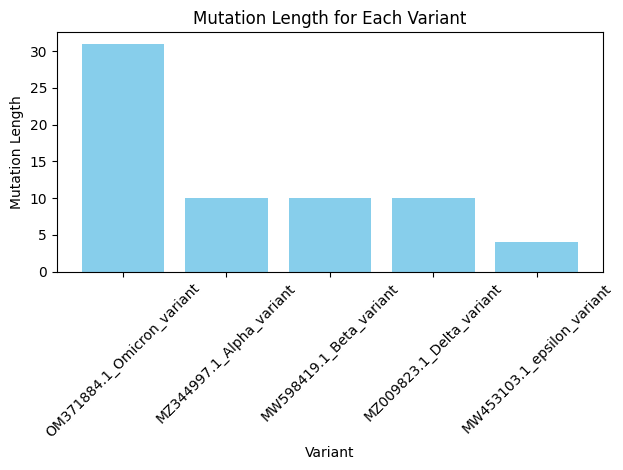

In [74]:
mutation_lengths = {}
for variant_id, variant_seq in seqs.items():
    if variant_id != 'MN908947.3_wuhan_strain':
        mutations = get_mutations(seqs['MN908947.3_wuhan_strain'], variant_seq)
        mutation_lengths[variant_id] = len(mutations)

# Plotting
import matplotlib.pyplot as plt

plt.bar(mutation_lengths.keys(), mutation_lengths.values(), color='skyblue')
plt.xlabel('Variant')
plt.ylabel('Mutation Length')
plt.title('Mutation Length for Each Variant')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

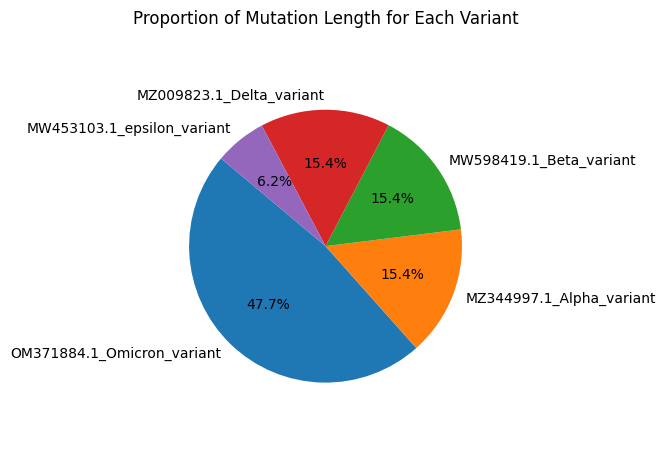

In [75]:
plt.pie(mutation_lengths.values(), labels=mutation_lengths.keys(), autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportion of Mutation Length for Each Variant')
plt.tight_layout()
plt.show()
